# Train Log 20181023 - voxel size: 0.3

## Results
```
2018-10-23 18:43:54.765851   Train one epoch  20 /  20


100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-23 18:47:25.521768  [Epoch 19] mean loss: 0.000082
2018-10-23 18:47:25.522598  [Epoch 19] accuracy: 0.992361
2018-10-23 18:47:25.523153  [Epoch 19] avg class acc: 0.972878
2018-10-23 18:47:25.523308  [Epoch 19] indivisual [0] class recall: 0.991803
2018-10-23 18:47:25.523498  [Epoch 19] indivisual [0] class precision: 0.975806
2018-10-23 18:47:25.523970  [Epoch 19] indivisual [1] class recall: 1.000000
2018-10-23 18:47:25.524469  [Epoch 19] indivisual [1] class precision: 1.000000
2018-10-23 18:47:25.524569  [Epoch 19] indivisual [2] class recall: 0.926829
2018-10-23 18:47:25.524840  [Epoch 19] indivisual [2] class precision: 0.974359
2018-10-23 18:47:25.525107   Evaluation one (validation set) epoch  20 /  20


100%|██████████| 58/58 [00:12<00:00,  4.68it/s]

2018-10-23 18:47:38.029166  [Epoch 19] vali mean loss: 0.000329
2018-10-23 18:47:38.029439  [Epoch 19] vali accuracy: 0.992621
2018-10-23 18:47:38.029810  [Epoch 19] vali avg class acc: 1.000000
2018-10-23 18:47:38.030500  [Epoch 19] vali indivisual [0] class recall: 1.000000
2018-10-23 18:47:38.030662  [Epoch 19] vali indivisual [0] class precision: 1.000000
2018-10-23 18:47:38.031022  [Epoch 19] vali indivisual [1] class recall: 1.000000
2018-10-23 18:47:38.031204  [Epoch 19] vali indivisual [1] class precision: 1.000000
2018-10-23 18:47:38.031791  [Epoch 19] vali indivisual [2] class recall: 1.000000
2018-10-23 18:47:38.032155  [Epoch 19] vali indivisual [2] class precision: 1.000000
2018-10-23 18:47:38.032273   Evaluation one (test set) epoch  20 /  20


100%|██████████| 58/58 [00:12<00:00,  4.68it/s]

2018-10-23 18:47:50.528261  [Epoch 19] test mean loss: 0.000329
2018-10-23 18:47:50.528943  [Epoch 19] test accuracy: 0.991448
2018-10-23 18:47:50.529455  [Epoch 19] test avg class acc: 0.989247
2018-10-23 18:47:50.529772  [Epoch 19] test indivisual [0] class recall: 1.000000
2018-10-23 18:47:50.530099  [Epoch 19] test indivisual [0] class precision: 0.992593
2018-10-23 18:47:50.530443  [Epoch 19] test indivisual [1] class recall: 1.000000
2018-10-23 18:47:50.530540  [Epoch 19] test indivisual [1] class precision: 1.000000
2018-10-23 18:47:50.530793  [Epoch 19] test indivisual [2] class recall: 0.967742
2018-10-23 18:47:50.531067  [Epoch 19] test indivisual [2] class precision: 1.000000

```

## Trained model
* [Download link]()

## Evaluation
* Incorrect sample
![results]()

In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import time , datetime

sys.path.append( os.path.abspath('../../../Dataset/scripts'))
from utils import *

sys.path.append( os.path.abspath('../../model') )
from train import *
import model as MODEL

In [3]:
""" Path """

data_train_path = os.path.abspath('../../../Dataset/dataset/db_aug_v2_v_300_20181022_ndb_aug_v2_20181020/train.h5')
data_test_path = os.path.abspath('../../../Dataset/dataset/db_aug_v2_v_300_20181022_ndb_aug_v2_20181020/test.h5')
data_vali_path = os.path.abspath('../../../Dataset/dataset/db_aug_v2_v_300_20181022_ndb_aug_v2_20181020/vali.h5')

log_path = os.path.abspath('./train_log_20181023_v3.txt')

model_save_path = os.path.abspath('./model')
if not os.path.isdir(model_save_path) : os.mkdir(model_save_path)

""" Parameters """
GPU_INDEX = 0
NUM_POINT = 256
NUM_CLASSES = 3

BN_INIT_DECAY = 0.5
BN_DECAY_DECAY_RATE = 0.5
BN_DECAY_DECAY_STEP = float(200000)
BN_DECAY_CLIP = 0.99
DECAY_STEP = BN_DECAY_DECAY_STEP
DECAY_RATE = BN_DECAY_DECAY_RATE

BATCH_SIZE = 250

MOMENTUM = 0.9

BASE_LEARNING_RATE = 0.001

OPTIMIZER = 'adam'

MAX_EPOCH = 20

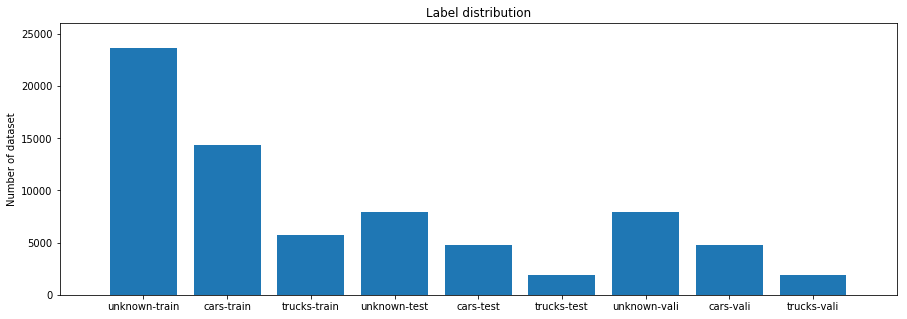

In [4]:
""" Load dataset"""

data = []
label = []

data_train, label_train = load_h5(data_train_path)
data_vali, label_vali = load_h5(data_vali_path)
data_test, label_test = load_h5(data_test_path)

data.append(data_train)
data.append(data_vali)
data.append(data_test)

label.append(label_train)
label.append(label_vali)
label.append(label_test)

""" Data statistics"""

label_list = [0,1,2]

y_val = []
for i in range( len ( data) ):
    for j in range ( len ( label_list ) ):
        y_val.append(np.sum(label[i] == label_list[j]))

x_name=('unknown-train', 'cars-train', 'trucks-train', 
        'unknown-test', 'cars-test', 'trucks-test', 
        'unknown-vali', 'cars-vali', 'trucks-vali')

index = range( len(x_name) )

plt.figure(figsize=(15,5))
plt.bar(index, y_val, tick_label=x_name, align='center')
plt.ylabel('Number of dataset')
plt.title('Label distribution')
plt.xlim( -1, len(x_name))
plt.ylim( 0, np.max(y_val) * 1.1 )
plt.show()

In [5]:
""" log file """
LOG_FOUT = open(log_path, 'w')

def log_string(out_str):
    out_str = str( datetime.datetime.fromtimestamp( time.time() ) ) + "  " + out_str
    LOG_FOUT.write(out_str+'\n')
    LOG_FOUT.flush()
    print(out_str)
    
    
def get_learning_rate(batch):
    learning_rate = tf.train.exponential_decay(
                        BASE_LEARNING_RATE,  # Base learning rate.
                        batch * BATCH_SIZE,  # Current index into the dataset.
                        DECAY_STEP,          # Decay step.
                        DECAY_RATE,          # Decay rate.
                        staircase=True)
    learning_rate = tf.maximum(learning_rate, 0.00001) # CLIP THE LEARNING RATE!
    return learning_rate        

def get_bn_decay(batch):
    bn_momentum = tf.train.exponential_decay(
                      BN_INIT_DECAY,
                      batch * BATCH_SIZE,
                      BN_DECAY_DECAY_STEP,
                      BN_DECAY_DECAY_RATE,
                      staircase=True)
    bn_decay = tf.minimum(BN_DECAY_CLIP, 1 - bn_momentum)
    return bn_decay

""" load traing model """
with tf.Graph().as_default():
    with tf.device('/gpu:'+str(GPU_INDEX)):
        pointclouds_pl, labels_pl = MODEL.placeholder_inputs(BATCH_SIZE, NUM_POINT)
        is_training_pl = tf.placeholder(tf.bool, shape=())
        print(is_training_pl)

        # Note the global_step=batch parameter to minimize. 
        # That tells the optimizer to helpfully increment the 'batch' parameter for you every time it trains.
        batch = tf.Variable(0)
        bn_decay = get_bn_decay(batch)
        tf.summary.scalar('bn_decay', bn_decay)

        # Get model and loss 
        pred, end_points = MODEL.get_model(pointclouds_pl, is_training_pl, bn_decay=bn_decay)
        loss = MODEL.get_loss(pred, labels_pl, end_points)
        tf.summary.scalar('loss', loss)

        correct = tf.equal(tf.argmax(pred, 1), tf.to_int64(labels_pl))
        accuracy = tf.reduce_sum(tf.cast(correct, tf.float32)) / float(BATCH_SIZE)
        tf.summary.scalar('accuracy', accuracy)

        # Get training operator
        learning_rate = get_learning_rate(batch)
        tf.summary.scalar('learning_rate', learning_rate)
        if OPTIMIZER == 'momentum':
            optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=MOMENTUM)
        elif OPTIMIZER == 'adam':
            optimizer = tf.train.AdamOptimizer(learning_rate)
        train_op = optimizer.minimize(loss, global_step=batch)

        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()

    # Create a session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    config.allow_soft_placement = True
    config.log_device_placement = False
    sess = tf.Session(config=config)

    # Add summary writers
    #merged = tf.merge_all_summaries()
    merged = tf.summary.merge_all()

    train_writer_path = os.path.abspath('./train')
    if os.path.isdir(train_writer_path): os.system('rm -r {}'.format(train_writer_path))
    os.mkdir(train_writer_path)
        
    test_writer_path = os.path.abspath('./test')
    if os.path.isdir(test_writer_path): os.system('rm -r {}'.format(test_writer_path))
    os.mkdir(test_writer_path)
    
    
    train_writer = tf.summary.FileWriter(train_writer_path, sess.graph)
    test_writer = tf.summary.FileWriter(test_writer_path)
    
    
    # Init variables
    init = tf.global_variables_initializer()
    # To fix the bug introduced in TF 0.12.1 as in
    # http://stackoverflow.com/questions/41543774/invalidargumenterror-for-tensor-bool-tensorflow-0-12-1
    #sess.run(init)
    sess.run(init, {is_training_pl: True})

    ops = {'pointclouds_pl': pointclouds_pl,
           'labels_pl': labels_pl,
           'is_training_pl': is_training_pl,
           'pred': pred,
           'loss': loss,
           'train_op': train_op,
           'merged': merged,
           'step': batch}
    
    data_train = np.concatenate(data[:2])
    label_train = np.concatenate(label[:2])
    
    data_vali = data[1]
    label_vali = label[1]
    
    data_test = data[2]
    label_test = label[2]
    
        
    for epoch in range(MAX_EPOCH):
        
        ## Training
        log_string ( " Train one epoch %3d / %3d" % (epoch+1, MAX_EPOCH) )
        sys.stdout.flush()
        
        is_training = True
        
        # Shuffle train files
        train_file_idxs = np.arange(0, data_train.shape[0])
        np.random.shuffle(train_file_idxs)
        
        current_data = data_train[train_file_idxs] 
        current_label = label_train[train_file_idxs]
              
        ## Evaluation metric
        total_correct = 0
        total_seen = 0
        loss_sum = 0
        
        total_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_class = [0 for _ in range(NUM_CLASSES)]
        total_correct_class = [0 for _ in range(NUM_CLASSES)]
            
        num_batches = current_data.shape[0] // BATCH_SIZE
               
        for batch_idx in trange(num_batches):
            
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE           

            # Augment batched point clouds by rotation and jittering
            rotated_data = provider.rotate_point_cloud(current_data[start_idx:end_idx, :, :])
            jittered_data = provider.jitter_point_cloud(rotated_data)
            
            feed_dict = {ops['pointclouds_pl']: jittered_data,
                         ops['labels_pl']: current_label[start_idx:end_idx],
                         ops['is_training_pl']: is_training,}
            
            summary, step, _, loss_val, pred_val = sess.run([ops['merged'], ops['step'],
                ops['train_op'], ops['loss'], ops['pred']], feed_dict=feed_dict)
            
            train_writer.add_summary(summary, step)
            
            pred_val = np.argmax(pred_val, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += BATCH_SIZE
            loss_sum += loss_val
            
            for i in range(NUM_CLASSES):
                total_class[i] = np.sum( np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx] )
                total_detect_class[i] = np.sum( np.ones(BATCH_SIZE) * i == pred_val )
                total_correct_class[i] = np.sum( (np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx]) * \
                                                    (np.ones(BATCH_SIZE) * i == pred_val) )
                                
        log_string(  '[Epoch %d] mean loss: %f' % \
                   (  epoch, loss_sum / float(total_seen)  )   )
        log_string(  '[Epoch %d] accuracy: %f'% \
                   (  epoch, total_correct / float(total_seen)  )   )
        log_string(  '[Epoch %d] avg class acc: %f' % \
                   (  epoch, np.mean( np.array(total_correct_class)/np.array(total_class,dtype=np.float) )  )   )
        
        for i_cls in range(NUM_CLASSES):
            log_string(  '[Epoch %d] indivisual [%d] class recall: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_class[i_cls])))    
            log_string(  '[Epoch %d] indivisual [%d] class precision: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_detect_class[i_cls])))    


        ## Evaluation using validation set    
        log_string ( " Evaluation one (validation set) epoch %3d / %3d" % (epoch+1, MAX_EPOCH) )
        sys.stdout.flush()
        
        is_training = False
        total_correct = 0
        total_seen = 0
        total_seen_class = [0 for _ in range(NUM_CLASSES)]
        total_correct_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_true_class = [0 for _ in range(NUM_CLASSES)]
        
        # Shuffle validation files
        file_idxs = np.arange(0, data_vali.shape[0])
        np.random.shuffle(file_idxs)
        
        current_data = data_vali[file_idxs]
        current_label = label_vali[file_idxs]
        
        num_batches = current_data.shape[0] // BATCH_SIZE
               
        for batch_idx in trange(num_batches):
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE

            feed_dict = {ops['pointclouds_pl']: current_data[start_idx:end_idx, :, :],
                         ops['labels_pl']: current_label[start_idx:end_idx],
                         ops['is_training_pl']: is_training}
            summary, step, loss_val, pred_val = sess.run([ops['merged'], ops['step'],
                ops['loss'], ops['pred']], feed_dict=feed_dict)
            
            # test_writer.add_summary(summary, step)
            
            pred_val = np.argmax(pred_val, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += BATCH_SIZE
            
            for i in range(NUM_CLASSES):
                total_class[i] = np.sum( np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx] )
                total_detect_class[i] = np.sum( np.ones(BATCH_SIZE) * i == pred_val )
                total_correct_class[i] = np.sum( (np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx]) * \
                                                    (np.ones(BATCH_SIZE) * i == pred_val) )
                                
        log_string(  '[Epoch %d] vali mean loss: %f' % \
                   (  epoch, loss_sum / float(total_seen)  )   )
        log_string(  '[Epoch %d] vali accuracy: %f'% \
                   (  epoch, total_correct / float(total_seen)  )   )
        log_string(  '[Epoch %d] vali avg class acc: %f' % \
                   (  epoch, np.mean( np.array(total_correct_class) / np.array(total_class) )  )   )
        
        for i_cls in range(NUM_CLASSES):
            log_string(  '[Epoch %d] vali indivisual [%d] class recall: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_class[i_cls])))    
            log_string(  '[Epoch %d] vali indivisual [%d] class precision: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_detect_class[i_cls])))    
            
        ## Evaluation using test set    
        log_string ( " Evaluation one (test set) epoch %3d / %3d" % (epoch+1, MAX_EPOCH) )
        sys.stdout.flush()
        
        is_training = False
        total_correct = 0
        total_seen = 0
        total_seen_class = [0 for _ in range(NUM_CLASSES)]
        total_correct_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_true_class = [0 for _ in range(NUM_CLASSES)]
        
        # Shuffle test files
        file_idxs = np.arange(0, data_test.shape[0])
        np.random.shuffle(file_idxs)
        
        current_data = data_test[file_idxs]
        current_label = label_test[file_idxs]
        
        
        num_batches = current_data.shape[0] // BATCH_SIZE
               
        for batch_idx in trange(num_batches):
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE

            feed_dict = {ops['pointclouds_pl']: current_data[start_idx:end_idx, :, :],
                         ops['labels_pl']: current_label[start_idx:end_idx],
                         ops['is_training_pl']: is_training}
            summary, step, loss_val, pred_val = sess.run([ops['merged'], ops['step'],
                ops['loss'], ops['pred']], feed_dict=feed_dict)
            
            test_writer.add_summary(summary, step)
            
            pred_val = np.argmax(pred_val, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += BATCH_SIZE
            
            for i in range(NUM_CLASSES):
                total_class[i] = np.sum( np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx] )
                total_detect_class[i] = np.sum( np.ones(BATCH_SIZE) * i == pred_val )
                total_correct_class[i] = np.sum( (np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx]) * \
                                                    (np.ones(BATCH_SIZE) * i == pred_val) )
                                
        log_string(  '[Epoch %d] test mean loss: %f' % \
                   (  epoch, loss_sum / float(total_seen)  )   )
        log_string(  '[Epoch %d] test accuracy: %f'% \
                   (  epoch, total_correct / float(total_seen)  )   )
        log_string(  '[Epoch %d] test avg class acc: %f' % \
                   (  epoch, np.mean( np.array(total_correct_class)/np.array(total_class,dtype=np.float) )  )   )
        
        for i_cls in range(NUM_CLASSES):
            log_string(  '[Epoch %d] test indivisual [%d] class recall: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_class[i_cls])))    
            log_string(  '[Epoch %d] test indivisual [%d] class precision: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_detect_class[i_cls])))    
 
        # Save the variables to disk.
        if epoch % 10 == 0:
            save_path = saver.save(sess, os.path.join(model_save_path, "model.ckpt"))
            log_string("Model saved in file: %s" % save_path)
                

Tensor("Placeholder_2:0", shape=(), dtype=bool, device=/device:GPU:0)
INFO:tensorflow:Summary name classify loss is illegal; using classify_loss instead.
INFO:tensorflow:Summary name mat loss is illegal; using mat_loss instead.
2018-10-23 17:29:15.454405   Train one epoch   1 /  20


100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-23 17:32:45.520202  [Epoch 0] mean loss: 0.002849
2018-10-23 17:32:45.520992  [Epoch 0] accuracy: 0.855931
2018-10-23 17:32:45.521664  [Epoch 0] avg class acc: 0.905365
2018-10-23 17:32:45.521817  [Epoch 0] indivisual [0] class recall: 0.905109
2018-10-23 17:32:45.522312  [Epoch 0] indivisual [0] class precision: 0.946565
2018-10-23 17:32:45.522510  [Epoch 0] indivisual [1] class recall: 0.962500
2018-10-23 17:32:45.522843  [Epoch 0] indivisual [1] class precision: 0.895349
2018-10-23 17:32:45.522967  [Epoch 0] indivisual [2] class recall: 0.848485
2018-10-23 17:32:45.523149  [Epoch 0] indivisual [2] class precision: 0.848485
2018-10-23 17:32:45.523743   Evaluation one (validation set) epoch   1 /  20



100%|██████████| 58/58 [00:12<00:00,  4.66it/s]

2018-10-23 17:32:58.078027  [Epoch 0] vali mean loss: 0.011446
2018-10-23 17:32:58.078593  [Epoch 0] vali accuracy: 0.921724
2018-10-23 17:32:58.079078  [Epoch 0] vali avg class acc: 0.000000
2018-10-23 17:32:58.079280  [Epoch 0] vali indivisual [0] class recall: 0.909091
2018-10-23 17:32:58.079613  [Epoch 0] vali indivisual [0] class precision: 0.859375
2018-10-23 17:32:58.080029  [Epoch 0] vali indivisual [1] class recall: 0.855556
2018-10-23 17:32:58.080159  [Epoch 0] vali indivisual [1] class precision: 0.987179
2018-10-23 17:32:58.080457  [Epoch 0] vali indivisual [2] class recall: 0.846154
2018-10-23 17:32:58.080742  [Epoch 0] vali indivisual [2] class precision: 0.750000
2018-10-23 17:32:58.081079   Evaluation one (test set) epoch   1 /  20



100%|██████████| 58/58 [00:12<00:00,  4.72it/s]


2018-10-23 17:33:10.511015  [Epoch 0] test mean loss: 0.011446
2018-10-23 17:33:10.511756  [Epoch 0] test accuracy: 0.918759
2018-10-23 17:33:10.512288  [Epoch 0] test avg class acc: 0.888903
2018-10-23 17:33:10.512742  [Epoch 0] test indivisual [0] class recall: 0.952756
2018-10-23 17:33:10.512922  [Epoch 0] test indivisual [0] class precision: 0.883212
2018-10-23 17:33:10.513173  [Epoch 0] test indivisual [1] class recall: 0.900000
2018-10-23 17:33:10.513460  [Epoch 0] test indivisual [1] class precision: 0.986301
2018-10-23 17:33:10.514015  [Epoch 0] test indivisual [2] class recall: 0.813953
2018-10-23 17:33:10.514286  [Epoch 0] test indivisual [2] class precision: 0.875000
2018-10-23 17:33:11.411811  Model saved in file: /home/gozilla/kyungpyo/git/MasterThesisProject/Network/notebook/train_log_20181023_v3/model/model.ckpt
2018-10-23 17:33:11.412091   Train one epoch   2 /  20


100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-23 17:36:41.006964  [Epoch 1] mean loss: 0.000816
2018-10-23 17:36:41.007768  [Epoch 1] accuracy: 0.935416
2018-10-23 17:36:41.009387  [Epoch 1] avg class acc: 0.954938
2018-10-23 17:36:41.009752  [Epoch 1] indivisual [0] class recall: 0.948148
2018-10-23 17:36:41.009938  [Epoch 1] indivisual [0] class precision: 0.984615
2018-10-23 17:36:41.010147  [Epoch 1] indivisual [1] class recall: 1.000000
2018-10-23 17:36:41.010294  [Epoch 1] indivisual [1] class precision: 0.989130
2018-10-23 17:36:41.010832  [Epoch 1] indivisual [2] class recall: 0.916667
2018-10-23 17:36:41.010986  [Epoch 1] indivisual [2] class precision: 0.785714
2018-10-23 17:36:41.011102   Evaluation one (validation set) epoch   2 /  20



100%|██████████| 58/58 [00:12<00:00,  4.71it/s]

2018-10-23 17:36:53.473091  [Epoch 1] vali mean loss: 0.003278
2018-10-23 17:36:53.473839  [Epoch 1] vali accuracy: 0.918069
2018-10-23 17:36:53.474358  [Epoch 1] vali avg class acc: 0.000000
2018-10-23 17:36:53.474871  [Epoch 1] vali indivisual [0] class recall: 0.979021
2018-10-23 17:36:53.475113  [Epoch 1] vali indivisual [0] class precision: 0.869565
2018-10-23 17:36:53.475394  [Epoch 1] vali indivisual [1] class recall: 0.833333
2018-10-23 17:36:53.475484  [Epoch 1] vali indivisual [1] class precision: 1.000000
2018-10-23 17:36:53.475637  [Epoch 1] vali indivisual [2] class recall: 0.742857
2018-10-23 17:36:53.476150  [Epoch 1] vali indivisual [2] class precision: 0.896552
2018-10-23 17:36:53.476303   Evaluation one (test set) epoch   2 /  20



100%|██████████| 58/58 [00:12<00:00,  4.69it/s]

2018-10-23 17:37:05.915926  [Epoch 1] test mean loss: 0.003278
2018-10-23 17:37:05.916675  [Epoch 1] test accuracy: 0.918138
2018-10-23 17:37:05.917345  [Epoch 1] test avg class acc: 0.878365
2018-10-23 17:37:05.917574  [Epoch 1] test indivisual [0] class recall: 0.985714
2018-10-23 17:37:05.917819  [Epoch 1] test indivisual [0] class precision: 0.884615
2018-10-23 17:37:05.918014  [Epoch 1] test indivisual [1] class recall: 0.855263
2018-10-23 17:37:05.918611  [Epoch 1] test indivisual [1] class precision: 1.000000
2018-10-23 17:37:05.918748  [Epoch 1] test indivisual [2] class recall: 0.794118
2018-10-23 17:37:05.918872  [Epoch 1] test indivisual [2] class precision: 0.931034
2018-10-23 17:37:05.919293   Train one epoch   3 /  20



100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-23 17:40:36.225664  [Epoch 2] mean loss: 0.000617
2018-10-23 17:40:36.226200  [Epoch 2] accuracy: 0.947639
2018-10-23 17:40:36.226564  [Epoch 2] avg class acc: 0.910188
2018-10-23 17:40:36.227165  [Epoch 2] indivisual [0] class recall: 0.947368
2018-10-23 17:40:36.227284  [Epoch 2] indivisual [0] class precision: 0.940299
2018-10-23 17:40:36.227626  [Epoch 2] indivisual [1] class recall: 0.976744
2018-10-23 17:40:36.227699  [Epoch 2] indivisual [1] class precision: 1.000000
2018-10-23 17:40:36.227765  [Epoch 2] indivisual [2] class recall: 0.806452
2018-10-23 17:40:36.227828  [Epoch 2] indivisual [2] class precision: 0.781250
2018-10-23 17:40:36.227900   Evaluation one (validation set) epoch   3 /  20



100%|██████████| 58/58 [00:12<00:00,  4.71it/s]

2018-10-23 17:40:48.643481  [Epoch 2] vali mean loss: 0.002479
2018-10-23 17:40:48.644215  [Epoch 2] vali accuracy: 0.947172
2018-10-23 17:40:48.644734  [Epoch 2] vali avg class acc: 0.333333
2018-10-23 17:40:48.645099  [Epoch 2] vali indivisual [0] class recall: 0.992063
2018-10-23 17:40:48.645237  [Epoch 2] vali indivisual [0] class precision: 0.939850
2018-10-23 17:40:48.645489  [Epoch 2] vali indivisual [1] class recall: 1.000000
2018-10-23 17:40:48.645971  [Epoch 2] vali indivisual [1] class precision: 0.987805
2018-10-23 17:40:48.646245  [Epoch 2] vali indivisual [2] class recall: 0.790698
2018-10-23 17:40:48.646404  [Epoch 2] vali indivisual [2] class precision: 0.971429
2018-10-23 17:40:48.646643   Evaluation one (test set) epoch   3 /  20



100%|██████████| 58/58 [00:12<00:00,  4.70it/s]

2018-10-23 17:41:01.090518  [Epoch 2] test mean loss: 0.002479
2018-10-23 17:41:01.090886  [Epoch 2] test accuracy: 0.945379
2018-10-23 17:41:01.092740  [Epoch 2] test avg class acc: 0.895022
2018-10-23 17:41:01.093091  [Epoch 2] test indivisual [0] class recall: 1.000000
2018-10-23 17:41:01.093242  [Epoch 2] test indivisual [0] class precision: 0.923611
2018-10-23 17:41:01.093478  [Epoch 2] test indivisual [1] class recall: 0.988095
2018-10-23 17:41:01.093608  [Epoch 2] test indivisual [1] class precision: 1.000000
2018-10-23 17:41:01.094161  [Epoch 2] test indivisual [2] class recall: 0.696970
2018-10-23 17:41:01.094259  [Epoch 2] test indivisual [2] class precision: 1.000000
2018-10-23 17:41:01.094689   Train one epoch   4 /  20



100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-23 17:44:31.556147  [Epoch 3] mean loss: 0.000444
2018-10-23 17:44:31.556768  [Epoch 3] accuracy: 0.960206
2018-10-23 17:44:31.557472  [Epoch 3] avg class acc: 0.924480
2018-10-23 17:44:31.557794  [Epoch 3] indivisual [0] class recall: 0.961538
2018-10-23 17:44:31.557968  [Epoch 3] indivisual [0] class precision: 0.946970
2018-10-23 17:44:31.558125  [Epoch 3] indivisual [1] class recall: 0.988372
2018-10-23 17:44:31.558566  [Epoch 3] indivisual [1] class precision: 1.000000
2018-10-23 17:44:31.558828  [Epoch 3] indivisual [2] class recall: 0.823529
2018-10-23 17:44:31.558958  [Epoch 3] indivisual [2] class precision: 0.848485
2018-10-23 17:44:31.559472   Evaluation one (validation set) epoch   4 /  20



100%|██████████| 58/58 [00:12<00:00,  4.71it/s]

2018-10-23 17:44:43.971353  [Epoch 3] vali mean loss: 0.001783
2018-10-23 17:44:43.972013  [Epoch 3] vali accuracy: 0.946966
2018-10-23 17:44:43.972563  [Epoch 3] vali avg class acc: 0.000000
2018-10-23 17:44:43.972927  [Epoch 3] vali indivisual [0] class recall: 0.993056
2018-10-23 17:44:43.973258  [Epoch 3] vali indivisual [0] class precision: 0.940789
2018-10-23 17:44:43.973577  [Epoch 3] vali indivisual [1] class recall: 0.987654
2018-10-23 17:44:43.973710  [Epoch 3] vali indivisual [1] class precision: 1.000000
2018-10-23 17:44:43.973886  [Epoch 3] vali indivisual [2] class recall: 0.680000
2018-10-23 17:44:43.974036  [Epoch 3] vali indivisual [2] class precision: 0.944444
2018-10-23 17:44:43.974355   Evaluation one (test set) epoch   4 /  20



100%|██████████| 58/58 [00:12<00:00,  4.70it/s]

2018-10-23 17:44:56.417125  [Epoch 3] test mean loss: 0.001783
2018-10-23 17:44:56.417940  [Epoch 3] test accuracy: 0.942069
2018-10-23 17:44:56.418414  [Epoch 3] test avg class acc: 0.831448
2018-10-23 17:44:56.418600  [Epoch 3] test indivisual [0] class recall: 1.000000
2018-10-23 17:44:56.419002  [Epoch 3] test indivisual [0] class precision: 0.871951
2018-10-23 17:44:56.419438  [Epoch 3] test indivisual [1] class recall: 0.955882
2018-10-23 17:44:56.419545  [Epoch 3] test indivisual [1] class precision: 1.000000
2018-10-23 17:44:56.419808  [Epoch 3] test indivisual [2] class recall: 0.538462
2018-10-23 17:44:56.420075  [Epoch 3] test indivisual [2] class precision: 1.000000
2018-10-23 17:44:56.420289   Train one epoch   5 /  20



100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-23 17:48:27.131534  [Epoch 4] mean loss: 0.000335
2018-10-23 17:48:27.132233  [Epoch 4] accuracy: 0.968481
2018-10-23 17:48:27.133075  [Epoch 4] avg class acc: 0.967014
2018-10-23 17:48:27.133209  [Epoch 4] indivisual [0] class recall: 0.984375
2018-10-23 17:48:27.133558  [Epoch 4] indivisual [0] class precision: 0.976744
2018-10-23 17:48:27.134022  [Epoch 4] indivisual [1] class recall: 1.000000
2018-10-23 17:48:27.134217  [Epoch 4] indivisual [1] class precision: 0.988506
2018-10-23 17:48:27.134338  [Epoch 4] indivisual [2] class recall: 0.916667
2018-10-23 17:48:27.134542  [Epoch 4] indivisual [2] class precision: 0.970588
2018-10-23 17:48:27.135132   Evaluation one (validation set) epoch   5 /  20



100%|██████████| 58/58 [00:12<00:00,  4.68it/s]

2018-10-23 17:48:39.645454  [Epoch 4] vali mean loss: 0.001344
2018-10-23 17:48:39.646438  [Epoch 4] vali accuracy: 0.929448
2018-10-23 17:48:39.646870  [Epoch 4] vali avg class acc: 0.000000
2018-10-23 17:48:39.647142  [Epoch 4] vali indivisual [0] class recall: 0.991597
2018-10-23 17:48:39.647398  [Epoch 4] vali indivisual [0] class precision: 0.880597
2018-10-23 17:48:39.647684  [Epoch 4] vali indivisual [1] class recall: 0.947917
2018-10-23 17:48:39.648102  [Epoch 4] vali indivisual [1] class precision: 0.989130
2018-10-23 17:48:39.648244  [Epoch 4] vali indivisual [2] class recall: 0.657143
2018-10-23 17:48:39.648466  [Epoch 4] vali indivisual [2] class precision: 0.958333
2018-10-23 17:48:39.648731   Evaluation one (test set) epoch   5 /  20



100%|██████████| 58/58 [00:12<00:00,  4.69it/s]

2018-10-23 17:48:52.102041  [Epoch 4] test mean loss: 0.001344
2018-10-23 17:48:52.102446  [Epoch 4] test accuracy: 0.928345
2018-10-23 17:48:52.104528  [Epoch 4] test avg class acc: 0.855967
2018-10-23 17:48:52.104931  [Epoch 4] test indivisual [0] class recall: 1.000000
2018-10-23 17:48:52.105299  [Epoch 4] test indivisual [0] class precision: 0.916129
2018-10-23 17:48:52.105760  [Epoch 4] test indivisual [1] class recall: 0.975309
2018-10-23 17:48:52.106020  [Epoch 4] test indivisual [1] class precision: 1.000000
2018-10-23 17:48:52.106119  [Epoch 4] test indivisual [2] class recall: 0.592593
2018-10-23 17:48:52.106532  [Epoch 4] test indivisual [2] class precision: 1.000000
2018-10-23 17:48:52.106638   Train one epoch   6 /  20



100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-23 17:52:23.168339  [Epoch 5] mean loss: 0.000332
2018-10-23 17:52:23.168780  [Epoch 5] accuracy: 0.968893
2018-10-23 17:52:23.169427  [Epoch 5] avg class acc: 0.976420
2018-10-23 17:52:23.169762  [Epoch 5] indivisual [0] class recall: 0.992593
2018-10-23 17:52:23.169916  [Epoch 5] indivisual [0] class precision: 0.985294
2018-10-23 17:52:23.170471  [Epoch 5] indivisual [1] class recall: 0.986667
2018-10-23 17:52:23.170578  [Epoch 5] indivisual [1] class precision: 0.986667
2018-10-23 17:52:23.170856  [Epoch 5] indivisual [2] class recall: 0.950000
2018-10-23 17:52:23.171314  [Epoch 5] indivisual [2] class precision: 0.974359
2018-10-23 17:52:23.171596   Evaluation one (validation set) epoch   6 /  20



100%|██████████| 58/58 [00:12<00:00,  4.67it/s]

2018-10-23 17:52:35.680544  [Epoch 5] vali mean loss: 0.001335
2018-10-23 17:52:35.681228  [Epoch 5] vali accuracy: 0.910552
2018-10-23 17:52:35.681662  [Epoch 5] vali avg class acc: 0.333333
2018-10-23 17:52:35.682246  [Epoch 5] vali indivisual [0] class recall: 1.000000
2018-10-23 17:52:35.682383  [Epoch 5] vali indivisual [0] class precision: 0.857143
2018-10-23 17:52:35.682489  [Epoch 5] vali indivisual [1] class recall: 0.926829
2018-10-23 17:52:35.682924  [Epoch 5] vali indivisual [1] class precision: 1.000000
2018-10-23 17:52:35.683188  [Epoch 5] vali indivisual [2] class recall: 0.555556
2018-10-23 17:52:35.683578  [Epoch 5] vali indivisual [2] class precision: 1.000000
2018-10-23 17:52:35.683729   Evaluation one (test set) epoch   6 /  20



100%|██████████| 58/58 [00:12<00:00,  4.70it/s]

2018-10-23 17:52:48.126362  [Epoch 5] test mean loss: 0.001335
2018-10-23 17:52:48.126997  [Epoch 5] test accuracy: 0.908345
2018-10-23 17:52:48.127507  [Epoch 5] test avg class acc: 0.853132
2018-10-23 17:52:48.127668  [Epoch 5] test indivisual [0] class recall: 1.000000
2018-10-23 17:52:48.128056  [Epoch 5] test indivisual [0] class precision: 0.862745
2018-10-23 17:52:48.128307  [Epoch 5] test indivisual [1] class recall: 0.851064
2018-10-23 17:52:48.128710  [Epoch 5] test indivisual [1] class precision: 1.000000
2018-10-23 17:52:48.128803  [Epoch 5] test indivisual [2] class recall: 0.708333
2018-10-23 17:52:48.129057  [Epoch 5] test indivisual [2] class precision: 1.000000
2018-10-23 17:52:48.129212   Train one epoch   7 /  20



100%|██████████| 233/233 [03:30<00:00,  1.10it/s]

2018-10-23 17:56:19.291093  [Epoch 6] mean loss: 0.000293
2018-10-23 17:56:19.291613  [Epoch 6] accuracy: 0.972910
2018-10-23 17:56:19.292217  [Epoch 6] avg class acc: 0.986377
2018-10-23 17:56:19.292513  [Epoch 6] indivisual [0] class recall: 0.971631
2018-10-23 17:56:19.292845  [Epoch 6] indivisual [0] class precision: 1.000000
2018-10-23 17:56:19.292985  [Epoch 6] indivisual [1] class recall: 0.987500
2018-10-23 17:56:19.293209  [Epoch 6] indivisual [1] class precision: 1.000000
2018-10-23 17:56:19.293335  [Epoch 6] indivisual [2] class recall: 1.000000
2018-10-23 17:56:19.293463  [Epoch 6] indivisual [2] class precision: 0.852941
2018-10-23 17:56:19.294147   Evaluation one (validation set) epoch   7 /  20



100%|██████████| 58/58 [00:12<00:00,  4.72it/s]

2018-10-23 17:56:31.701218  [Epoch 6] vali mean loss: 0.001178
2018-10-23 17:56:31.701810  [Epoch 6] vali accuracy: 0.924069
2018-10-23 17:56:31.702094  [Epoch 6] vali avg class acc: 0.333333
2018-10-23 17:56:31.702309  [Epoch 6] vali indivisual [0] class recall: 1.000000
2018-10-23 17:56:31.702533  [Epoch 6] vali indivisual [0] class precision: 0.826087
2018-10-23 17:56:31.702945  [Epoch 6] vali indivisual [1] class recall: 0.894737
2018-10-23 17:56:31.703591  [Epoch 6] vali indivisual [1] class precision: 0.985507
2018-10-23 17:56:31.703868  [Epoch 6] vali indivisual [2] class recall: 0.487805
2018-10-23 17:56:31.703999  [Epoch 6] vali indivisual [2] class precision: 1.000000
2018-10-23 17:56:31.704184   Evaluation one (test set) epoch   7 /  20



100%|██████████| 58/58 [00:12<00:00,  4.70it/s]

2018-10-23 17:56:44.151371  [Epoch 6] test mean loss: 0.001178
2018-10-23 17:56:44.151883  [Epoch 6] test accuracy: 0.918621
2018-10-23 17:56:44.153874  [Epoch 6] test avg class acc: 0.823452
2018-10-23 17:56:44.154177  [Epoch 6] test indivisual [0] class recall: 1.000000
2018-10-23 17:56:44.154521  [Epoch 6] test indivisual [0] class precision: 0.895062
2018-10-23 17:56:44.154976  [Epoch 6] test indivisual [1] class recall: 0.986486
2018-10-23 17:56:44.155114  [Epoch 6] test indivisual [1] class precision: 1.000000
2018-10-23 17:56:44.155391  [Epoch 6] test indivisual [2] class recall: 0.483871
2018-10-23 17:56:44.155775  [Epoch 6] test indivisual [2] class precision: 1.000000
2018-10-23 17:56:44.156175   Train one epoch   8 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-23 18:00:14.383065  [Epoch 7] mean loss: 0.000213
2018-10-23 18:00:14.383620  [Epoch 7] accuracy: 0.980395
2018-10-23 18:00:14.384502  [Epoch 7] avg class acc: 0.989331
2018-10-23 18:00:14.384847  [Epoch 7] indivisual [0] class recall: 0.991803
2018-10-23 18:00:14.385134  [Epoch 7] indivisual [0] class precision: 0.991803
2018-10-23 18:00:14.385556  [Epoch 7] indivisual [1] class recall: 1.000000
2018-10-23 18:00:14.385658  [Epoch 7] indivisual [1] class precision: 1.000000
2018-10-23 18:00:14.386085  [Epoch 7] indivisual [2] class recall: 0.976190
2018-10-23 18:00:14.386182  [Epoch 7] indivisual [2] class precision: 0.976190
2018-10-23 18:00:14.386310   Evaluation one (validation set) epoch   8 /  20



100%|██████████| 58/58 [00:12<00:00,  4.70it/s]

2018-10-23 18:00:26.851378  [Epoch 7] vali mean loss: 0.000857
2018-10-23 18:00:26.851908  [Epoch 7] vali accuracy: 0.984207
2018-10-23 18:00:26.852460  [Epoch 7] vali avg class acc: 0.666667
2018-10-23 18:00:26.852777  [Epoch 7] vali indivisual [0] class recall: 0.985075
2018-10-23 18:00:26.853096  [Epoch 7] vali indivisual [0] class precision: 1.000000
2018-10-23 18:00:26.853316  [Epoch 7] vali indivisual [1] class recall: 1.000000
2018-10-23 18:00:26.853473  [Epoch 7] vali indivisual [1] class precision: 1.000000
2018-10-23 18:00:26.854061  [Epoch 7] vali indivisual [2] class recall: 1.000000
2018-10-23 18:00:26.854318  [Epoch 7] vali indivisual [2] class precision: 0.935484
2018-10-23 18:00:26.854607   Evaluation one (test set) epoch   8 /  20



100%|██████████| 58/58 [00:12<00:00,  4.70it/s]

2018-10-23 18:00:39.299879  [Epoch 7] test mean loss: 0.000857
2018-10-23 18:00:39.300837  [Epoch 7] test accuracy: 0.984414
2018-10-23 18:00:39.301150  [Epoch 7] test avg class acc: 0.977011
2018-10-23 18:00:39.301542  [Epoch 7] test indivisual [0] class recall: 1.000000
2018-10-23 18:00:39.301914  [Epoch 7] test indivisual [0] class precision: 0.985401
2018-10-23 18:00:39.302052  [Epoch 7] test indivisual [1] class recall: 1.000000
2018-10-23 18:00:39.302292  [Epoch 7] test indivisual [1] class precision: 1.000000
2018-10-23 18:00:39.302670  [Epoch 7] test indivisual [2] class recall: 0.931034
2018-10-23 18:00:39.302765  [Epoch 7] test indivisual [2] class precision: 1.000000
2018-10-23 18:00:39.303133   Train one epoch   9 /  20



100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-23 18:04:09.865527  [Epoch 8] mean loss: 0.000207
2018-10-23 18:04:09.866270  [Epoch 8] accuracy: 0.980395
2018-10-23 18:04:09.866800  [Epoch 8] avg class acc: 0.959360
2018-10-23 18:04:09.867393  [Epoch 8] indivisual [0] class recall: 0.971831
2018-10-23 18:04:09.867831  [Epoch 8] indivisual [0] class precision: 0.978723
2018-10-23 18:04:09.867966  [Epoch 8] indivisual [1] class recall: 1.000000
2018-10-23 18:04:09.868258  [Epoch 8] indivisual [1] class precision: 1.000000
2018-10-23 18:04:09.868602  [Epoch 8] indivisual [2] class recall: 0.906250
2018-10-23 18:04:09.868962  [Epoch 8] indivisual [2] class precision: 0.878788
2018-10-23 18:04:09.869065   Evaluation one (validation set) epoch   9 /  20



100%|██████████| 58/58 [00:12<00:00,  4.66it/s]

2018-10-23 18:04:22.441313  [Epoch 8] vali mean loss: 0.000831
2018-10-23 18:04:22.442246  [Epoch 8] vali accuracy: 0.965931
2018-10-23 18:04:22.443191  [Epoch 8] vali avg class acc: 0.666667
2018-10-23 18:04:22.443432  [Epoch 8] vali indivisual [0] class recall: 1.000000
2018-10-23 18:04:22.443935  [Epoch 8] vali indivisual [0] class precision: 0.950704
2018-10-23 18:04:22.444325  [Epoch 8] vali indivisual [1] class recall: 1.000000
2018-10-23 18:04:22.444533  [Epoch 8] vali indivisual [1] class precision: 1.000000
2018-10-23 18:04:22.444800  [Epoch 8] vali indivisual [2] class recall: 0.758621
2018-10-23 18:04:22.445218  [Epoch 8] vali indivisual [2] class precision: 1.000000
2018-10-23 18:04:22.445340   Evaluation one (test set) epoch   9 /  20



100%|██████████| 58/58 [00:12<00:00,  4.68it/s]

2018-10-23 18:04:34.947508  [Epoch 8] test mean loss: 0.000831
2018-10-23 18:04:34.948190  [Epoch 8] test accuracy: 0.966483
2018-10-23 18:04:34.948548  [Epoch 8] test avg class acc: 0.926829
2018-10-23 18:04:34.948820  [Epoch 8] test indivisual [0] class recall: 1.000000
2018-10-23 18:04:34.949319  [Epoch 8] test indivisual [0] class precision: 0.932836
2018-10-23 18:04:34.949490  [Epoch 8] test indivisual [1] class recall: 1.000000
2018-10-23 18:04:34.949735  [Epoch 8] test indivisual [1] class precision: 1.000000
2018-10-23 18:04:34.950273  [Epoch 8] test indivisual [2] class recall: 0.780488
2018-10-23 18:04:34.950372  [Epoch 8] test indivisual [2] class precision: 1.000000
2018-10-23 18:04:34.950652   Train one epoch  10 /  20



100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-23 18:08:05.612011  [Epoch 9] mean loss: 0.000203
2018-10-23 18:08:05.612652  [Epoch 9] accuracy: 0.980910
2018-10-23 18:08:05.613323  [Epoch 9] avg class acc: 0.990408
2018-10-23 18:08:05.613514  [Epoch 9] indivisual [0] class recall: 0.971223
2018-10-23 18:08:05.614056  [Epoch 9] indivisual [0] class precision: 1.000000
2018-10-23 18:08:05.614259  [Epoch 9] indivisual [1] class recall: 1.000000
2018-10-23 18:08:05.614386  [Epoch 9] indivisual [1] class precision: 1.000000
2018-10-23 18:08:05.614602  [Epoch 9] indivisual [2] class recall: 1.000000
2018-10-23 18:08:05.615085  [Epoch 9] indivisual [2] class precision: 0.885714
2018-10-23 18:08:05.615363   Evaluation one (validation set) epoch  10 /  20



100%|██████████| 58/58 [00:12<00:00,  4.71it/s]

2018-10-23 18:08:18.081497  [Epoch 9] vali mean loss: 0.000817
2018-10-23 18:08:18.081754  [Epoch 9] vali accuracy: 0.981586
2018-10-23 18:08:18.082157  [Epoch 9] vali avg class acc: 0.333333
2018-10-23 18:08:18.082765  [Epoch 9] vali indivisual [0] class recall: 0.992647
2018-10-23 18:08:18.083059  [Epoch 9] vali indivisual [0] class precision: 0.971223
2018-10-23 18:08:18.083252  [Epoch 9] vali indivisual [1] class recall: 1.000000
2018-10-23 18:08:18.083576  [Epoch 9] vali indivisual [1] class precision: 1.000000
2018-10-23 18:08:18.083746  [Epoch 9] vali indivisual [2] class recall: 0.862069
2018-10-23 18:08:18.083844  [Epoch 9] vali indivisual [2] class precision: 0.961538
2018-10-23 18:08:18.084058   Evaluation one (test set) epoch  10 /  20



100%|██████████| 58/58 [00:12<00:00,  4.70it/s]

2018-10-23 18:08:30.533354  [Epoch 9] test mean loss: 0.000817
2018-10-23 18:08:30.533631  [Epoch 9] test accuracy: 0.983241
2018-10-23 18:08:30.534256  [Epoch 9] test avg class acc: 0.980814
2018-10-23 18:08:30.534453  [Epoch 9] test indivisual [0] class recall: 1.000000
2018-10-23 18:08:30.535129  [Epoch 9] test indivisual [0] class precision: 0.979866
2018-10-23 18:08:30.535417  [Epoch 9] test indivisual [1] class recall: 0.971014
2018-10-23 18:08:30.535550  [Epoch 9] test indivisual [1] class precision: 1.000000
2018-10-23 18:08:30.535683  [Epoch 9] test indivisual [2] class recall: 0.971429
2018-10-23 18:08:30.535992  [Epoch 9] test indivisual [2] class precision: 1.000000
2018-10-23 18:08:30.536123   Train one epoch  11 /  20



100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-23 18:12:01.504893  [Epoch 10] mean loss: 0.000178
2018-10-23 18:12:01.505634  [Epoch 10] accuracy: 0.983451
2018-10-23 18:12:01.506024  [Epoch 10] avg class acc: 0.995062
2018-10-23 18:12:01.506518  [Epoch 10] indivisual [0] class recall: 0.985185
2018-10-23 18:12:01.506927  [Epoch 10] indivisual [0] class precision: 1.000000
2018-10-23 18:12:01.507274  [Epoch 10] indivisual [1] class recall: 1.000000
2018-10-23 18:12:01.507412  [Epoch 10] indivisual [1] class precision: 1.000000
2018-10-23 18:12:01.507637  [Epoch 10] indivisual [2] class recall: 1.000000
2018-10-23 18:12:01.507820  [Epoch 10] indivisual [2] class precision: 0.947368
2018-10-23 18:12:01.507975   Evaluation one (validation set) epoch  11 /  20



100%|██████████| 58/58 [00:12<00:00,  4.71it/s]

2018-10-23 18:12:13.930107  [Epoch 10] vali mean loss: 0.000716
2018-10-23 18:12:13.930878  [Epoch 10] vali accuracy: 0.977310
2018-10-23 18:12:13.931334  [Epoch 10] vali avg class acc: 0.333333
2018-10-23 18:12:13.931933  [Epoch 10] vali indivisual [0] class recall: 0.993103
2018-10-23 18:12:13.932163  [Epoch 10] vali indivisual [0] class precision: 0.986301
2018-10-23 18:12:13.932330  [Epoch 10] vali indivisual [1] class recall: 1.000000
2018-10-23 18:12:13.932569  [Epoch 10] vali indivisual [1] class precision: 1.000000
2018-10-23 18:12:13.932775  [Epoch 10] vali indivisual [2] class recall: 0.916667
2018-10-23 18:12:13.933235  [Epoch 10] vali indivisual [2] class precision: 0.956522
2018-10-23 18:12:13.933506   Evaluation one (test set) epoch  11 /  20



100%|██████████| 58/58 [00:12<00:00,  4.68it/s]


2018-10-23 18:12:26.428614  [Epoch 10] test mean loss: 0.000716
2018-10-23 18:12:26.429261  [Epoch 10] test accuracy: 0.978000
2018-10-23 18:12:26.429832  [Epoch 10] test avg class acc: 0.920608
2018-10-23 18:12:26.430147  [Epoch 10] test indivisual [0] class recall: 0.992593
2018-10-23 18:12:26.430390  [Epoch 10] test indivisual [0] class precision: 0.937063
2018-10-23 18:12:26.430695  [Epoch 10] test indivisual [1] class recall: 1.000000
2018-10-23 18:12:26.430823  [Epoch 10] test indivisual [1] class precision: 1.000000
2018-10-23 18:12:26.430993  [Epoch 10] test indivisual [2] class recall: 0.769231
2018-10-23 18:12:26.431162  [Epoch 10] test indivisual [2] class precision: 0.967742
2018-10-23 18:12:27.247179  Model saved in file: /home/gozilla/kyungpyo/git/MasterThesisProject/Network/notebook/train_log_20181023_v3/model/model.ckpt
2018-10-23 18:12:27.247412   Train one epoch  12 /  20


100%|██████████| 233/233 [03:30<00:00,  1.10it/s]

2018-10-23 18:15:58.458272  [Epoch 11] mean loss: 0.000140
2018-10-23 18:15:58.458976  [Epoch 11] accuracy: 0.987262
2018-10-23 18:15:58.460842  [Epoch 11] avg class acc: 0.995434
2018-10-23 18:15:58.461293  [Epoch 11] indivisual [0] class recall: 0.986301
2018-10-23 18:15:58.461627  [Epoch 11] indivisual [0] class precision: 1.000000
2018-10-23 18:15:58.462067  [Epoch 11] indivisual [1] class recall: 1.000000
2018-10-23 18:15:58.462171  [Epoch 11] indivisual [1] class precision: 1.000000
2018-10-23 18:15:58.462607  [Epoch 11] indivisual [2] class recall: 1.000000
2018-10-23 18:15:58.462707  [Epoch 11] indivisual [2] class precision: 0.937500
2018-10-23 18:15:58.462840   Evaluation one (validation set) epoch  12 /  20



100%|██████████| 58/58 [00:12<00:00,  4.70it/s]

2018-10-23 18:16:10.927803  [Epoch 11] vali mean loss: 0.000561
2018-10-23 18:16:10.928181  [Epoch 11] vali accuracy: 0.977931
2018-10-23 18:16:10.928781  [Epoch 11] vali avg class acc: 0.333333
2018-10-23 18:16:10.929118  [Epoch 11] vali indivisual [0] class recall: 0.985714
2018-10-23 18:16:10.929394  [Epoch 11] vali indivisual [0] class precision: 0.958333
2018-10-23 18:16:10.929553  [Epoch 11] vali indivisual [1] class recall: 1.000000
2018-10-23 18:16:10.929703  [Epoch 11] vali indivisual [1] class precision: 1.000000
2018-10-23 18:16:10.929827  [Epoch 11] vali indivisual [2] class recall: 0.818182
2018-10-23 18:16:10.930538  [Epoch 11] vali indivisual [2] class precision: 0.931034
2018-10-23 18:16:10.930735   Evaluation one (test set) epoch  12 /  20



100%|██████████| 58/58 [00:12<00:00,  4.67it/s]

2018-10-23 18:16:23.467645  [Epoch 11] test mean loss: 0.000561
2018-10-23 18:16:23.468479  [Epoch 11] test accuracy: 0.980345
2018-10-23 18:16:23.468747  [Epoch 11] test avg class acc: 0.969697
2018-10-23 18:16:23.469213  [Epoch 11] test indivisual [0] class recall: 1.000000
2018-10-23 18:16:23.469582  [Epoch 11] test indivisual [0] class precision: 0.979310
2018-10-23 18:16:23.469841  [Epoch 11] test indivisual [1] class recall: 1.000000
2018-10-23 18:16:23.469933  [Epoch 11] test indivisual [1] class precision: 1.000000
2018-10-23 18:16:23.470292  [Epoch 11] test indivisual [2] class recall: 0.909091
2018-10-23 18:16:23.470477  [Epoch 11] test indivisual [2] class precision: 1.000000
2018-10-23 18:16:23.470610   Train one epoch  13 /  20



100%|██████████| 233/233 [03:31<00:00,  1.10it/s]

2018-10-23 18:19:54.785129  [Epoch 12] mean loss: 0.000145
2018-10-23 18:19:54.785435  [Epoch 12] accuracy: 0.986627
2018-10-23 18:19:54.786145  [Epoch 12] avg class acc: 0.960784
2018-10-23 18:19:54.786465  [Epoch 12] indivisual [0] class recall: 1.000000
2018-10-23 18:19:54.786646  [Epoch 12] indivisual [0] class precision: 0.971014
2018-10-23 18:19:54.786946  [Epoch 12] indivisual [1] class recall: 1.000000
2018-10-23 18:19:54.787121  [Epoch 12] indivisual [1] class precision: 1.000000
2018-10-23 18:19:54.787695  [Epoch 12] indivisual [2] class recall: 0.882353
2018-10-23 18:19:54.788049  [Epoch 12] indivisual [2] class precision: 1.000000
2018-10-23 18:19:54.788151   Evaluation one (validation set) epoch  13 /  20



100%|██████████| 58/58 [00:12<00:00,  4.71it/s]

2018-10-23 18:20:07.255808  [Epoch 12] vali mean loss: 0.000583
2018-10-23 18:20:07.256231  [Epoch 12] vali accuracy: 0.979724
2018-10-23 18:20:07.256853  [Epoch 12] vali avg class acc: 0.666667
2018-10-23 18:20:07.257176  [Epoch 12] vali indivisual [0] class recall: 1.000000
2018-10-23 18:20:07.257317  [Epoch 12] vali indivisual [0] class precision: 0.993007
2018-10-23 18:20:07.257839  [Epoch 12] vali indivisual [1] class recall: 1.000000
2018-10-23 18:20:07.258090  [Epoch 12] vali indivisual [1] class precision: 1.000000
2018-10-23 18:20:07.258285  [Epoch 12] vali indivisual [2] class recall: 0.968750
2018-10-23 18:20:07.258472  [Epoch 12] vali indivisual [2] class precision: 1.000000
2018-10-23 18:20:07.258596   Evaluation one (test set) epoch  13 /  20



100%|██████████| 58/58 [00:12<00:00,  4.70it/s]

2018-10-23 18:20:19.698111  [Epoch 12] test mean loss: 0.000583
2018-10-23 18:20:19.698727  [Epoch 12] test accuracy: 0.980828
2018-10-23 18:20:19.699260  [Epoch 12] test avg class acc: 0.951037
2018-10-23 18:20:19.699714  [Epoch 12] test indivisual [0] class recall: 0.992647
2018-10-23 18:20:19.699825  [Epoch 12] test indivisual [0] class precision: 0.957447
2018-10-23 18:20:19.700194  [Epoch 12] test indivisual [1] class recall: 1.000000
2018-10-23 18:20:19.700331  [Epoch 12] test indivisual [1] class precision: 1.000000
2018-10-23 18:20:19.700862  [Epoch 12] test indivisual [2] class recall: 0.860465
2018-10-23 18:20:19.700965  [Epoch 12] test indivisual [2] class precision: 0.973684
2018-10-23 18:20:19.701410   Train one epoch  14 /  20



100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-23 18:23:50.465761  [Epoch 13] mean loss: 0.000132
2018-10-23 18:23:50.466602  [Epoch 13] accuracy: 0.988103
2018-10-23 18:23:50.467006  [Epoch 13] avg class acc: 0.995305
2018-10-23 18:23:50.467778  [Epoch 13] indivisual [0] class recall: 0.985915
2018-10-23 18:23:50.468045  [Epoch 13] indivisual [0] class precision: 1.000000
2018-10-23 18:23:50.468243  [Epoch 13] indivisual [1] class recall: 1.000000
2018-10-23 18:23:50.468728  [Epoch 13] indivisual [1] class precision: 1.000000
2018-10-23 18:23:50.469111  [Epoch 13] indivisual [2] class recall: 1.000000
2018-10-23 18:23:50.469224  [Epoch 13] indivisual [2] class precision: 0.925926
2018-10-23 18:23:50.469537   Evaluation one (validation set) epoch  14 /  20



100%|██████████| 58/58 [00:12<00:00,  4.72it/s]

2018-10-23 18:24:02.902331  [Epoch 13] vali mean loss: 0.000530
2018-10-23 18:24:02.902685  [Epoch 13] vali accuracy: 0.982759
2018-10-23 18:24:02.903470  [Epoch 13] vali avg class acc: 0.333333
2018-10-23 18:24:02.903819  [Epoch 13] vali indivisual [0] class recall: 0.992063
2018-10-23 18:24:02.903974  [Epoch 13] vali indivisual [0] class precision: 0.968992
2018-10-23 18:24:02.904262  [Epoch 13] vali indivisual [1] class recall: 1.000000
2018-10-23 18:24:02.904390  [Epoch 13] vali indivisual [1] class precision: 1.000000
2018-10-23 18:24:02.904954  [Epoch 13] vali indivisual [2] class recall: 0.904762
2018-10-23 18:24:02.905222  [Epoch 13] vali indivisual [2] class precision: 0.974359
2018-10-23 18:24:02.905687   Evaluation one (test set) epoch  14 /  20



100%|██████████| 58/58 [00:12<00:00,  4.70it/s]

2018-10-23 18:24:15.357850  [Epoch 13] test mean loss: 0.000530
2018-10-23 18:24:15.358634  [Epoch 13] test accuracy: 0.982552
2018-10-23 18:24:15.359193  [Epoch 13] test avg class acc: 0.951058
2018-10-23 18:24:15.359573  [Epoch 13] test indivisual [0] class recall: 0.992063
2018-10-23 18:24:15.359748  [Epoch 13] test indivisual [0] class precision: 0.961538
2018-10-23 18:24:15.359896  [Epoch 13] test indivisual [1] class recall: 1.000000
2018-10-23 18:24:15.360149  [Epoch 13] test indivisual [1] class precision: 1.000000
2018-10-23 18:24:15.360366  [Epoch 13] test indivisual [2] class recall: 0.861111
2018-10-23 18:24:15.361079  [Epoch 13] test indivisual [2] class precision: 0.968750
2018-10-23 18:24:15.361291   Train one epoch  15 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-23 18:27:45.361814  [Epoch 14] mean loss: 0.000102
2018-10-23 18:27:45.362114  [Epoch 14] accuracy: 0.990850
2018-10-23 18:27:45.363055  [Epoch 14] avg class acc: 1.000000
2018-10-23 18:27:45.363200  [Epoch 14] indivisual [0] class recall: 1.000000
2018-10-23 18:27:45.363725  [Epoch 14] indivisual [0] class precision: 1.000000
2018-10-23 18:27:45.364139  [Epoch 14] indivisual [1] class recall: 1.000000
2018-10-23 18:27:45.364243  [Epoch 14] indivisual [1] class precision: 1.000000
2018-10-23 18:27:45.364623  [Epoch 14] indivisual [2] class recall: 1.000000
2018-10-23 18:27:45.364718  [Epoch 14] indivisual [2] class precision: 1.000000
2018-10-23 18:27:45.365061   Evaluation one (validation set) epoch  15 /  20



100%|██████████| 58/58 [00:12<00:00,  4.71it/s]

2018-10-23 18:27:57.849887  [Epoch 14] vali mean loss: 0.000408
2018-10-23 18:27:57.850278  [Epoch 14] vali accuracy: 0.984483
2018-10-23 18:27:57.850868  [Epoch 14] vali avg class acc: 0.333333
2018-10-23 18:27:57.851189  [Epoch 14] vali indivisual [0] class recall: 0.992701
2018-10-23 18:27:57.851516  [Epoch 14] vali indivisual [0] class precision: 0.992701
2018-10-23 18:27:57.851950  [Epoch 14] vali indivisual [1] class recall: 1.000000
2018-10-23 18:27:57.852043  [Epoch 14] vali indivisual [1] class precision: 1.000000
2018-10-23 18:27:57.852420  [Epoch 14] vali indivisual [2] class recall: 0.964286
2018-10-23 18:27:57.852614  [Epoch 14] vali indivisual [2] class precision: 0.964286
2018-10-23 18:27:57.852738   Evaluation one (test set) epoch  15 /  20



100%|██████████| 58/58 [00:12<00:00,  4.71it/s]

2018-10-23 18:28:10.346492  [Epoch 14] test mean loss: 0.000408
2018-10-23 18:28:10.347387  [Epoch 14] test accuracy: 0.983034
2018-10-23 18:28:10.347776  [Epoch 14] test avg class acc: 0.959596
2018-10-23 18:28:10.348260  [Epoch 14] test indivisual [0] class recall: 1.000000
2018-10-23 18:28:10.348461  [Epoch 14] test indivisual [0] class precision: 0.971631
2018-10-23 18:28:10.348712  [Epoch 14] test indivisual [1] class recall: 1.000000
2018-10-23 18:28:10.349084  [Epoch 14] test indivisual [1] class precision: 1.000000
2018-10-23 18:28:10.349466  [Epoch 14] test indivisual [2] class recall: 0.878788
2018-10-23 18:28:10.349576  [Epoch 14] test indivisual [2] class precision: 1.000000
2018-10-23 18:28:10.349904   Train one epoch  16 /  20



100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-23 18:31:41.545648  [Epoch 15] mean loss: 0.000104
2018-10-23 18:31:41.546437  [Epoch 15] accuracy: 0.990695
2018-10-23 18:31:41.547065  [Epoch 15] avg class acc: 0.982456
2018-10-23 18:31:41.547410  [Epoch 15] indivisual [0] class recall: 1.000000
2018-10-23 18:31:41.547545  [Epoch 15] indivisual [0] class precision: 0.986207
2018-10-23 18:31:41.547805  [Epoch 15] indivisual [1] class recall: 1.000000
2018-10-23 18:31:41.548133  [Epoch 15] indivisual [1] class precision: 1.000000
2018-10-23 18:31:41.548343  [Epoch 15] indivisual [2] class recall: 0.947368
2018-10-23 18:31:41.548792  [Epoch 15] indivisual [2] class precision: 1.000000
2018-10-23 18:31:41.548907   Evaluation one (validation set) epoch  16 /  20



100%|██████████| 58/58 [00:12<00:00,  4.70it/s]

2018-10-23 18:31:54.005547  [Epoch 15] vali mean loss: 0.000419
2018-10-23 18:31:54.006104  [Epoch 15] vali accuracy: 0.973586
2018-10-23 18:31:54.007060  [Epoch 15] vali avg class acc: 0.666667
2018-10-23 18:31:54.007359  [Epoch 15] vali indivisual [0] class recall: 1.000000
2018-10-23 18:31:54.007750  [Epoch 15] vali indivisual [0] class precision: 0.936620
2018-10-23 18:31:54.008053  [Epoch 15] vali indivisual [1] class recall: 1.000000
2018-10-23 18:31:54.008344  [Epoch 15] vali indivisual [1] class precision: 1.000000
2018-10-23 18:31:54.008782  [Epoch 15] vali indivisual [2] class recall: 0.785714
2018-10-23 18:31:54.008896  [Epoch 15] vali indivisual [2] class precision: 1.000000
2018-10-23 18:31:54.009190   Evaluation one (test set) epoch  16 /  20



100%|██████████| 58/58 [00:12<00:00,  4.70it/s]

2018-10-23 18:32:06.454846  [Epoch 15] test mean loss: 0.000419
2018-10-23 18:32:06.455605  [Epoch 15] test accuracy: 0.974069
2018-10-23 18:32:06.456231  [Epoch 15] test avg class acc: 0.923420
2018-10-23 18:32:06.456567  [Epoch 15] test indivisual [0] class recall: 0.992481
2018-10-23 18:32:06.456719  [Epoch 15] test indivisual [0] class precision: 0.942857
2018-10-23 18:32:06.456962  [Epoch 15] test indivisual [1] class recall: 1.000000
2018-10-23 18:32:06.457192  [Epoch 15] test indivisual [1] class precision: 1.000000
2018-10-23 18:32:06.457461  [Epoch 15] test indivisual [2] class recall: 0.777778
2018-10-23 18:32:06.457986  [Epoch 15] test indivisual [2] class precision: 0.965517
2018-10-23 18:32:06.458274   Train one epoch  17 /  20



100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-23 18:35:37.242372  [Epoch 16] mean loss: 0.000095
2018-10-23 18:35:37.242850  [Epoch 16] accuracy: 0.991056
2018-10-23 18:35:37.243316  [Epoch 16] avg class acc: 0.988095
2018-10-23 18:35:37.243731  [Epoch 16] indivisual [0] class recall: 1.000000
2018-10-23 18:35:37.244156  [Epoch 16] indivisual [0] class precision: 0.992424
2018-10-23 18:35:37.244456  [Epoch 16] indivisual [1] class recall: 1.000000
2018-10-23 18:35:37.244807  [Epoch 16] indivisual [1] class precision: 1.000000
2018-10-23 18:35:37.245180  [Epoch 16] indivisual [2] class recall: 0.964286
2018-10-23 18:35:37.245280  [Epoch 16] indivisual [2] class precision: 1.000000
2018-10-23 18:35:37.245694   Evaluation one (validation set) epoch  17 /  20



100%|██████████| 58/58 [00:12<00:00,  4.68it/s]

2018-10-23 18:35:49.767362  [Epoch 16] vali mean loss: 0.000383
2018-10-23 18:35:49.767755  [Epoch 16] vali accuracy: 0.991034
2018-10-23 18:35:49.768431  [Epoch 16] vali avg class acc: 0.666667
2018-10-23 18:35:49.768589  [Epoch 16] vali indivisual [0] class recall: 0.991525
2018-10-23 18:35:49.769071  [Epoch 16] vali indivisual [0] class precision: 1.000000
2018-10-23 18:35:49.769529  [Epoch 16] vali indivisual [1] class recall: 1.000000
2018-10-23 18:35:49.769647  [Epoch 16] vali indivisual [1] class precision: 1.000000
2018-10-23 18:35:49.769894  [Epoch 16] vali indivisual [2] class recall: 1.000000
2018-10-23 18:35:49.770225  [Epoch 16] vali indivisual [2] class precision: 0.976190
2018-10-23 18:35:49.770393   Evaluation one (test set) epoch  17 /  20



100%|██████████| 58/58 [00:12<00:00,  4.68it/s]

2018-10-23 18:36:02.272296  [Epoch 16] test mean loss: 0.000383
2018-10-23 18:36:02.272603  [Epoch 16] test accuracy: 0.990276
2018-10-23 18:36:02.273380  [Epoch 16] test avg class acc: 0.988889
2018-10-23 18:36:02.273620  [Epoch 16] test indivisual [0] class recall: 1.000000
2018-10-23 18:36:02.274079  [Epoch 16] test indivisual [0] class precision: 0.993007
2018-10-23 18:36:02.274170  [Epoch 16] test indivisual [1] class recall: 1.000000
2018-10-23 18:36:02.274378  [Epoch 16] test indivisual [1] class precision: 1.000000
2018-10-23 18:36:02.274491  [Epoch 16] test indivisual [2] class recall: 0.966667
2018-10-23 18:36:02.274939  [Epoch 16] test indivisual [2] class precision: 1.000000
2018-10-23 18:36:02.275345   Train one epoch  18 /  20



100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-23 18:39:33.334187  [Epoch 17] mean loss: 0.000085
2018-10-23 18:39:33.335284  [Epoch 17] accuracy: 0.992481
2018-10-23 18:39:33.335622  [Epoch 17] avg class acc: 0.983119
2018-10-23 18:39:33.336135  [Epoch 17] indivisual [0] class recall: 0.986395
2018-10-23 18:39:33.336254  [Epoch 17] indivisual [0] class precision: 0.993151
2018-10-23 18:39:33.336534  [Epoch 17] indivisual [1] class recall: 1.000000
2018-10-23 18:39:33.336812  [Epoch 17] indivisual [1] class precision: 1.000000
2018-10-23 18:39:33.337075  [Epoch 17] indivisual [2] class recall: 0.962963
2018-10-23 18:39:33.337235  [Epoch 17] indivisual [2] class precision: 0.928571
2018-10-23 18:39:33.337477   Evaluation one (validation set) epoch  18 /  20



100%|██████████| 58/58 [00:12<00:00,  4.69it/s]

2018-10-23 18:39:45.796108  [Epoch 17] vali mean loss: 0.000340
2018-10-23 18:39:45.796840  [Epoch 17] vali accuracy: 0.982000
2018-10-23 18:39:45.797308  [Epoch 17] vali avg class acc: 0.666667
2018-10-23 18:39:45.797682  [Epoch 17] vali indivisual [0] class recall: 1.000000
2018-10-23 18:39:45.797859  [Epoch 17] vali indivisual [0] class precision: 0.977444
2018-10-23 18:39:45.798351  [Epoch 17] vali indivisual [1] class recall: 1.000000
2018-10-23 18:39:45.798618  [Epoch 17] vali indivisual [1] class precision: 1.000000
2018-10-23 18:39:45.798820  [Epoch 17] vali indivisual [2] class recall: 0.909091
2018-10-23 18:39:45.798971  [Epoch 17] vali indivisual [2] class precision: 1.000000
2018-10-23 18:39:45.799153   Evaluation one (test set) epoch  18 /  20



100%|██████████| 58/58 [00:12<00:00,  4.69it/s]

2018-10-23 18:39:58.290595  [Epoch 17] test mean loss: 0.000340
2018-10-23 18:39:58.291442  [Epoch 17] test accuracy: 0.982483
2018-10-23 18:39:58.291874  [Epoch 17] test avg class acc: 0.983828
2018-10-23 18:39:58.292081  [Epoch 17] test indivisual [0] class recall: 0.993151
2018-10-23 18:39:58.292475  [Epoch 17] test indivisual [0] class precision: 0.993151
2018-10-23 18:39:58.292755  [Epoch 17] test indivisual [1] class recall: 1.000000
2018-10-23 18:39:58.292965  [Epoch 17] test indivisual [1] class precision: 1.000000
2018-10-23 18:39:58.293120  [Epoch 17] test indivisual [2] class recall: 0.958333
2018-10-23 18:39:58.293338  [Epoch 17] test indivisual [2] class precision: 0.958333
2018-10-23 18:39:58.293470   Train one epoch  19 /  20



100%|██████████| 233/233 [03:31<00:00,  1.10it/s]

2018-10-23 18:43:29.801015  [Epoch 18] mean loss: 0.000075
2018-10-23 18:43:29.801641  [Epoch 18] accuracy: 0.993253
2018-10-23 18:43:29.802053  [Epoch 18] avg class acc: 0.987654
2018-10-23 18:43:29.802586  [Epoch 18] indivisual [0] class recall: 1.000000
2018-10-23 18:43:29.802731  [Epoch 18] indivisual [0] class precision: 0.992126
2018-10-23 18:43:29.803155  [Epoch 18] indivisual [1] class recall: 1.000000
2018-10-23 18:43:29.803543  [Epoch 18] indivisual [1] class precision: 1.000000
2018-10-23 18:43:29.803909  [Epoch 18] indivisual [2] class recall: 0.962963
2018-10-23 18:43:29.804008  [Epoch 18] indivisual [2] class precision: 1.000000
2018-10-23 18:43:29.804243   Evaluation one (validation set) epoch  19 /  20



100%|██████████| 58/58 [00:12<00:00,  4.70it/s]

2018-10-23 18:43:42.263738  [Epoch 18] vali mean loss: 0.000303
2018-10-23 18:43:42.264107  [Epoch 18] vali accuracy: 0.988000
2018-10-23 18:43:42.264449  [Epoch 18] vali avg class acc: 0.333333
2018-10-23 18:43:42.265108  [Epoch 18] vali indivisual [0] class recall: 0.992958
2018-10-23 18:43:42.265216  [Epoch 18] vali indivisual [0] class precision: 0.972414
2018-10-23 18:43:42.265550  [Epoch 18] vali indivisual [1] class recall: 1.000000
2018-10-23 18:43:42.265890  [Epoch 18] vali indivisual [1] class precision: 1.000000
2018-10-23 18:43:42.266063  [Epoch 18] vali indivisual [2] class recall: 0.866667
2018-10-23 18:43:42.266437  [Epoch 18] vali indivisual [2] class precision: 0.962963
2018-10-23 18:43:42.266591   Evaluation one (test set) epoch  19 /  20



100%|██████████| 58/58 [00:12<00:00,  4.69it/s]

2018-10-23 18:43:54.762614  [Epoch 18] test mean loss: 0.000303
2018-10-23 18:43:54.762929  [Epoch 18] test accuracy: 0.988069
2018-10-23 18:43:54.763463  [Epoch 18] test avg class acc: 0.972922
2018-10-23 18:43:54.763853  [Epoch 18] test indivisual [0] class recall: 0.991935
2018-10-23 18:43:54.764097  [Epoch 18] test indivisual [0] class precision: 0.976190
2018-10-23 18:43:54.764832  [Epoch 18] test indivisual [1] class recall: 1.000000
2018-10-23 18:43:54.765196  [Epoch 18] test indivisual [1] class precision: 1.000000
2018-10-23 18:43:54.765292  [Epoch 18] test indivisual [2] class recall: 0.926829
2018-10-23 18:43:54.765647  [Epoch 18] test indivisual [2] class precision: 0.974359
2018-10-23 18:43:54.765851   Train one epoch  20 /  20



100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-23 18:47:25.521768  [Epoch 19] mean loss: 0.000082
2018-10-23 18:47:25.522598  [Epoch 19] accuracy: 0.992361
2018-10-23 18:47:25.523153  [Epoch 19] avg class acc: 0.972878
2018-10-23 18:47:25.523308  [Epoch 19] indivisual [0] class recall: 0.991803
2018-10-23 18:47:25.523498  [Epoch 19] indivisual [0] class precision: 0.975806
2018-10-23 18:47:25.523970  [Epoch 19] indivisual [1] class recall: 1.000000
2018-10-23 18:47:25.524469  [Epoch 19] indivisual [1] class precision: 1.000000
2018-10-23 18:47:25.524569  [Epoch 19] indivisual [2] class recall: 0.926829
2018-10-23 18:47:25.524840  [Epoch 19] indivisual [2] class precision: 0.974359
2018-10-23 18:47:25.525107   Evaluation one (validation set) epoch  20 /  20



100%|██████████| 58/58 [00:12<00:00,  4.68it/s]

2018-10-23 18:47:38.029166  [Epoch 19] vali mean loss: 0.000329
2018-10-23 18:47:38.029439  [Epoch 19] vali accuracy: 0.992621
2018-10-23 18:47:38.029810  [Epoch 19] vali avg class acc: 1.000000
2018-10-23 18:47:38.030500  [Epoch 19] vali indivisual [0] class recall: 1.000000
2018-10-23 18:47:38.030662  [Epoch 19] vali indivisual [0] class precision: 1.000000
2018-10-23 18:47:38.031022  [Epoch 19] vali indivisual [1] class recall: 1.000000
2018-10-23 18:47:38.031204  [Epoch 19] vali indivisual [1] class precision: 1.000000
2018-10-23 18:47:38.031791  [Epoch 19] vali indivisual [2] class recall: 1.000000
2018-10-23 18:47:38.032155  [Epoch 19] vali indivisual [2] class precision: 1.000000
2018-10-23 18:47:38.032273   Evaluation one (test set) epoch  20 /  20



100%|██████████| 58/58 [00:12<00:00,  4.68it/s]

2018-10-23 18:47:50.528261  [Epoch 19] test mean loss: 0.000329
2018-10-23 18:47:50.528943  [Epoch 19] test accuracy: 0.991448
2018-10-23 18:47:50.529455  [Epoch 19] test avg class acc: 0.989247
2018-10-23 18:47:50.529772  [Epoch 19] test indivisual [0] class recall: 1.000000
2018-10-23 18:47:50.530099  [Epoch 19] test indivisual [0] class precision: 0.992593
2018-10-23 18:47:50.530443  [Epoch 19] test indivisual [1] class recall: 1.000000
2018-10-23 18:47:50.530540  [Epoch 19] test indivisual [1] class precision: 1.000000
2018-10-23 18:47:50.530793  [Epoch 19] test indivisual [2] class recall: 0.967742
2018-10-23 18:47:50.531067  [Epoch 19] test indivisual [2] class precision: 1.000000
